In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Exploration

In [2]:
clustered_train_data = pd.read_csv(
    './clustered_train_data.csv',
    low_memory=False
)
submit = pd.read_csv(
    './submission_data.csv',
    low_memory=False
)
clustered_train_data

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,drug_in_other_countries,therapeutic_area_encoded,cluster_nl_encoded,cluster
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,...,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,True,10,467,5
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,...,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000,True,9,970,3
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,...,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258,True,9,650,5
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,...,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761,True,7,2111,2
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,...,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,True,7,668,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108339,BRAND_2058,2.074438,2.058055,BRAND_2058_COUNTRY_C8F4,CORP_3C9A,COUNTRY_C8F4,2020-11-01,2022-12-01,DRUG_ID_74A6,-1,...,0.095233,1.054007,1.100336,2.029851,THER_AREA_6CEE,1.203657,True,7,273,0
108340,BRAND_4888,1.756234,1.819485,BRAND_4888_COUNTRY_6F78,CORP_A713,COUNTRY_6F78,2019-07-01,2022-12-01,DRUG_ID_52A5,-1,...,0.033939,1.008317,1.029630,1.955224,THER_AREA_980E,1.109272,True,10,676,2
108341,BRAND_0056,1.127497,1.491552,BRAND_0056_COUNTRY_0C7D,CORP_01C7,COUNTRY_0C7D,2018-09-01,2022-12-01,DRUG_ID_D637,-1,...,0.012526,1.017259,1.018310,1.926795,THER_AREA_644A,1.343341,True,4,3,1
108342,BRAND_6200,1.874532,2.020277,BRAND_6200_COUNTRY_89F9,CORP_39F7,COUNTRY_89F9,2020-09-01,2022-12-01,DRUG_ID_B0E9,2020-11-01 00:00:00,...,0.001334,1.960978,2.490911,1.985847,THER_AREA_96D7,1.266831,True,9,946,2


In [3]:
submit['cluster_nl'].value_counts()

cluster_nl
BRAND_E57A_COUNTRY_06E4    12
BRAND_D72F_COUNTRY_3536    12
BRAND_6200_COUNTRY_9488    12
BRAND_267B_COUNTRY_9488    12
BRAND_740F_COUNTRY_3AD0    12
                           ..
BRAND_056A_COUNTRY_9488     2
BRAND_9259_COUNTRY_9488     2
BRAND_81A0_COUNTRY_9891     1
BRAND_B8DE_COUNTRY_C8F4     1
BRAND_417D_COUNTRY_B6AE     1
Name: count, Length: 182, dtype: int64

In [4]:
clustered_train_data['cluster_nl'].value_counts()

cluster_nl
BRAND_354E_COUNTRY_88A3    60
BRAND_60F2_COUNTRY_D8B0    60
BRAND_C020_COUNTRY_3AD0    60
BRAND_7A2E_COUNTRY_5FEB    60
BRAND_DBFB_COUNTRY_445D    60
                           ..
BRAND_2E82_COUNTRY_4D48     1
BRAND_B931_COUNTRY_4242     1
BRAND_2205_COUNTRY_5FEB     1
BRAND_F2F2_COUNTRY_B6AE     1
BRAND_3938_COUNTRY_907E     1
Name: count, Length: 2498, dtype: int64

In [6]:
# Group by 'cluster_nl' and collect the unique 'cluster' values
cluster_info = (
    clustered_train_data.groupby('cluster_nl')['cluster']
    .unique()
    .reset_index()
    .rename(columns={'cluster': 'clusters_involved'})
)

# Filter for 'cluster_nl' values that appear in more than one cluster
duplicated_clusters = cluster_info[cluster_info['clusters_involved'].apply(len) > 1]

# Sort by the number of clusters (in descending order)
duplicated_clusters['cluster_count'] = duplicated_clusters['clusters_involved'].apply(len)
duplicated_clusters = duplicated_clusters.sort_values(by='cluster_count', ascending=False)

# Display the results
duplicated_clusters

/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_1769/636994131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_clusters['cluster_count'] = duplicated_clusters['clusters_involved'].apply(len)


,cluster_nl,clusters_involved,cluster_count
1785,BRAND_BB7F_COUNTRY_5A54,"[1, 5, 0]",3
14,BRAND_0056_COUNTRY_5A54,"[1, 0]",2
2043,BRAND_CFD9_COUNTRY_D8B0,"[0, 2]",2
1778,BRAND_BAAB_COUNTRY_907E,"[5, 2]",2
1807,BRAND_BC1F_COUNTRY_EA71,"[1, 0]",2
...,...,...,...
916,BRAND_5FA3_COUNTRY_907E,"[5, 2]",2
919,BRAND_5FA3_COUNTRY_EA71,"[5, 2]",2
952,BRAND_6200_COUNTRY_EA71,"[5, 2]",2
960,BRAND_6221_COUNTRY_907E,"[1, 0]",2


In [7]:
# Group by 'cluster_nl' and collect the unique 'cluster' values
cluster_info = (
    clustered_train_data.groupby('drug_id')['cluster']
    .unique()
    .reset_index()
    .rename(columns={'cluster': 'clusters_involved'})
)

# Filter for 'cluster_nl' values that appear in more than one cluster
duplicated_clusters = cluster_info[cluster_info['clusters_involved'].apply(len) > 1]

# Display the results
duplicated_clusters

,drug_id,clusters_involved
0,DRUG_ID_0259,"[2, 5, 1, 7]"
2,DRUG_ID_032B,"[2, 5]"
3,DRUG_ID_0383,"[5, 2]"
5,DRUG_ID_0476,"[5, 2]"
6,DRUG_ID_04FA,"[0, 1, 7]"
...,...,...
241,DRUG_ID_F81B,"[5, 2, 7]"
242,DRUG_ID_F923,"[0, 1]"
243,DRUG_ID_F978,"[2, 5]"
244,DRUG_ID_FADD,"[2, 5, 7]"


# Origins

In [8]:
df = pd.read_csv(
    './train_data.csv',
    low_memory=False
)
dff = df

label_encoder = LabelEncoder()

dff['brand'] =  label_encoder.fit_transform(dff['brand'])
dff['cluster_nl'] =  label_encoder.fit_transform(dff['cluster_nl'])
dff['corporation'] =  label_encoder.fit_transform(dff['corporation'])
dff['country'] =  label_encoder.fit_transform(dff['country'])
dff['launch_date'] =  label_encoder.fit_transform(dff['launch_date'])
dff['date'] =  label_encoder.fit_transform(dff['date'])
dff['ind_launch_date'] =  label_encoder.fit_transform(dff['ind_launch_date'])
dff['indication'] =  label_encoder.fit_transform(dff['indication'])
dff['drug_id'] =  label_encoder.fit_transform(dff['drug_id'])
dff['therapeutic_area'] =  label_encoder.fit_transform(dff['therapeutic_area'])


columns = ['che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 
           'population', 'prev_perc', 'price_month', 
           'price_unit', 'target']

# Show the statistics for the selected columns
statistics = dff[columns].describe()

# Display the statistics
print(statistics)

          che_pc_usd   che_perc_gdp  insurance_perc_che     population  \
count  118917.000000  118917.000000       118917.000000  118917.000000   
mean        1.529389       1.607100            1.008999       1.483680   
std         0.439094       0.537994            1.044154       1.336542   
min        -1.000000      -1.000000           -1.000000       1.000000   
25%         1.179931       1.464849            1.000000       1.038227   
50%         1.472378       1.731474            1.346667       1.238870   
75%         1.816479       1.894139            1.760000       1.506685   
max         2.656913       2.311103            2.040000      12.767484   

          prev_perc    price_month     price_unit         target  
count  1.189170e+05  118917.000000  118917.000000  118917.000000  
mean   5.768206e-02       0.912442       1.463305       1.420171  
std    9.163269e-02       1.414511       5.464170       1.183330  
min    5.954162e-07      -1.000000      -1.000000       1.000000 

# Exploratory Clustering

--------------------------------------------------------Start_0--------------------------------------------------------
statistics
           che_pc_usd  che_perc_gdp  insurance_perc_che    population  \
count  16986.000000  16986.000000        16986.000000  16986.000000   
mean       1.852912      1.859231            0.667405      1.230238   
std        0.297347      0.151763            1.170754      0.285270   
min        1.360799      1.464473           -1.000000      1.001144   
25%        1.678683      1.791873           -1.000000      1.010895   
50%        1.788702      1.873394            1.013333      1.058446   
75%        1.946005      1.941136            1.573333      1.356278   
max        2.656913      2.311103            2.040000      2.020151   

          prev_perc   price_month    price_unit        target  
count  16986.000000  16986.000000  16986.000000  16986.000000  
mean       0.082128      0.817787      1.115291      1.317341  
std        0.060064      0.665743  

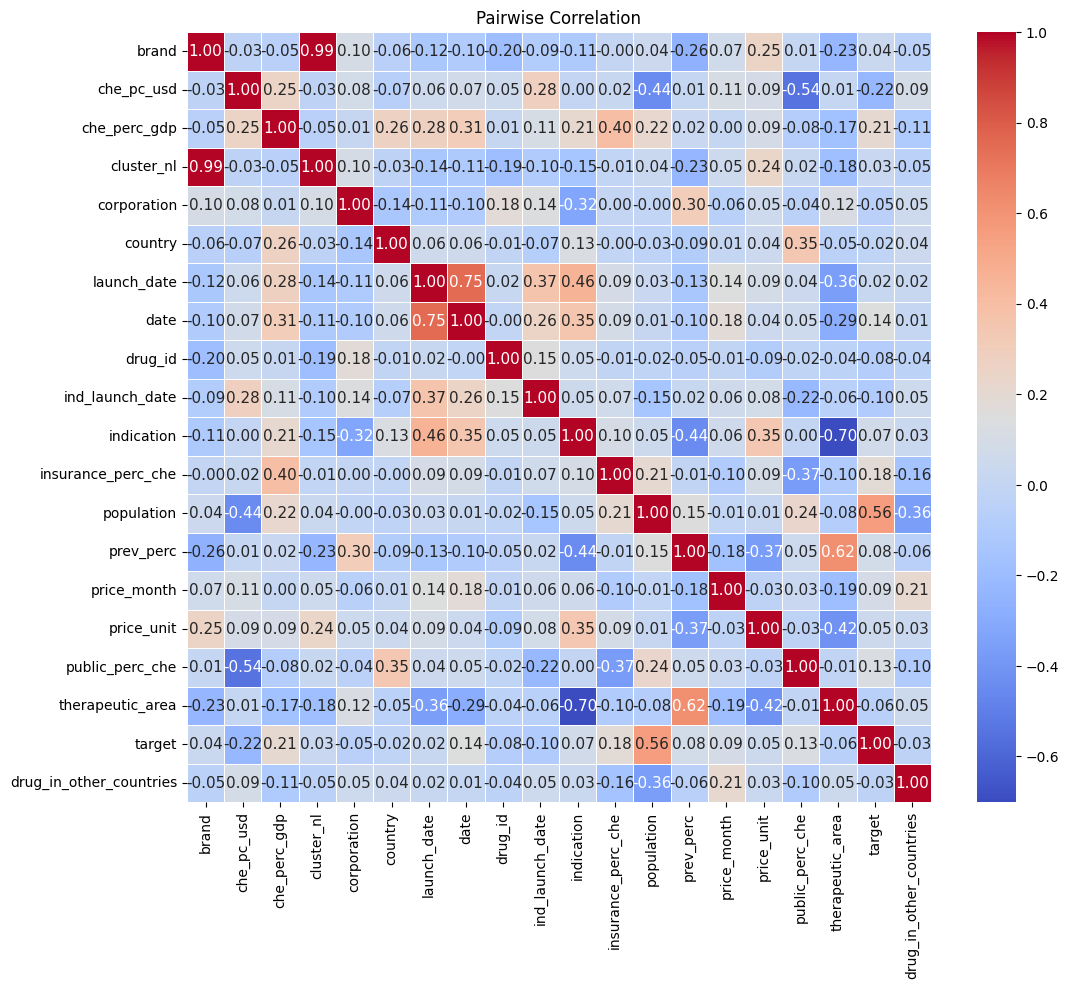


 Pairwise Rangking: 
 target                     1.000000
population                 0.558550
che_pc_usd                 0.223717
che_perc_gdp               0.208472
insurance_perc_che         0.184164
date                       0.144861
public_perc_che            0.128469
ind_launch_date            0.097407
price_month                0.094756
drug_id                    0.080893
prev_perc                  0.080271
indication                 0.072604
therapeutic_area           0.057548
corporation                0.050594
price_unit                 0.048613
brand                      0.035406
drug_in_other_countries    0.034919
cluster_nl                 0.029309
country                    0.019761
launch_date                0.019094
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.307519
15               price_unit    0.125006
7                      date    0.096914
14              price_month   

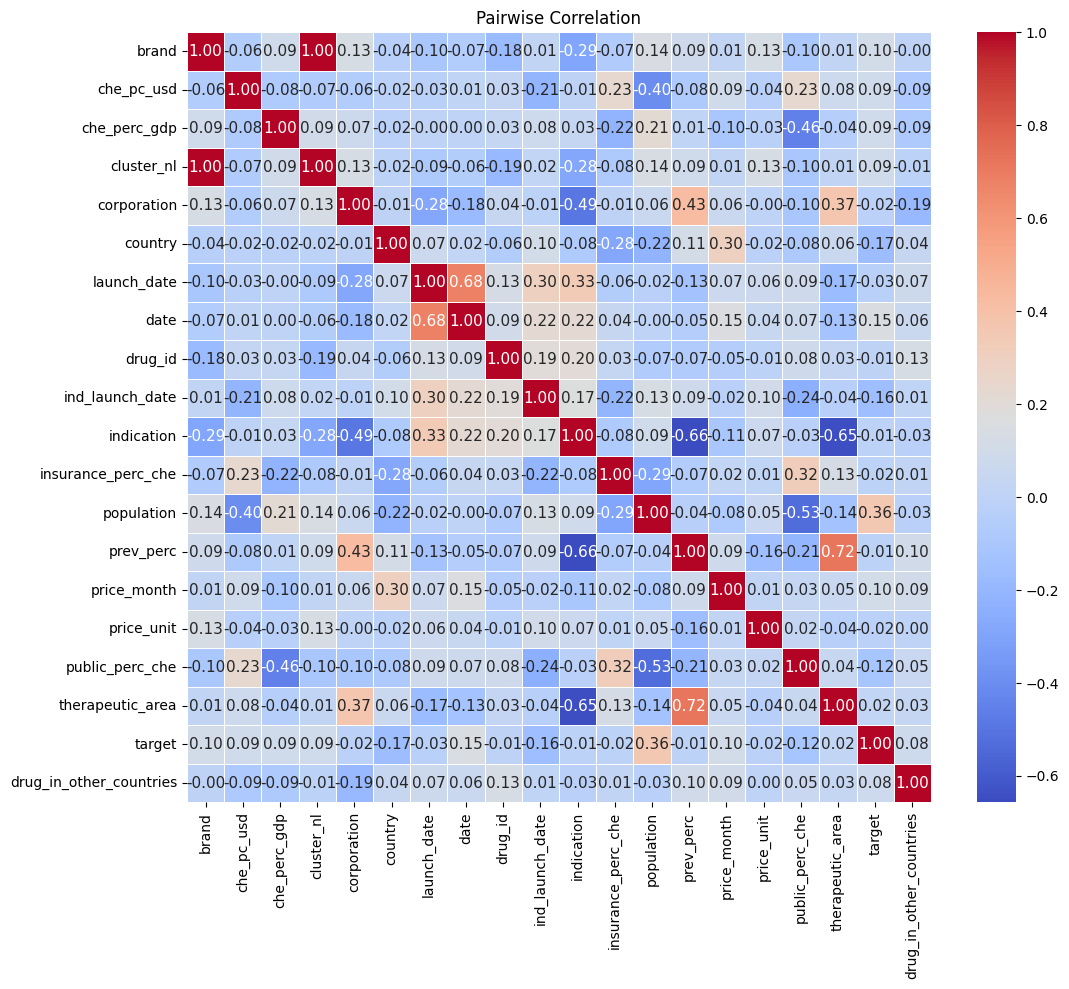


 Pairwise Rangking: 
 target                     1.000000
population                 0.357111
country                    0.169650
ind_launch_date            0.164809
date                       0.151137
public_perc_che            0.118026
price_month                0.104693
brand                      0.104451
cluster_nl                 0.092951
che_pc_usd                 0.090309
che_perc_gdp               0.089860
drug_in_other_countries    0.075865
launch_date                0.033954
price_unit                 0.021505
corporation                0.020106
therapeutic_area           0.018702
insurance_perc_che         0.015795
indication                 0.011902
prev_perc                  0.011628
drug_id                    0.005633
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.211301
6               launch_date    0.176682
7                      date    0.109540
13                prev_perc   

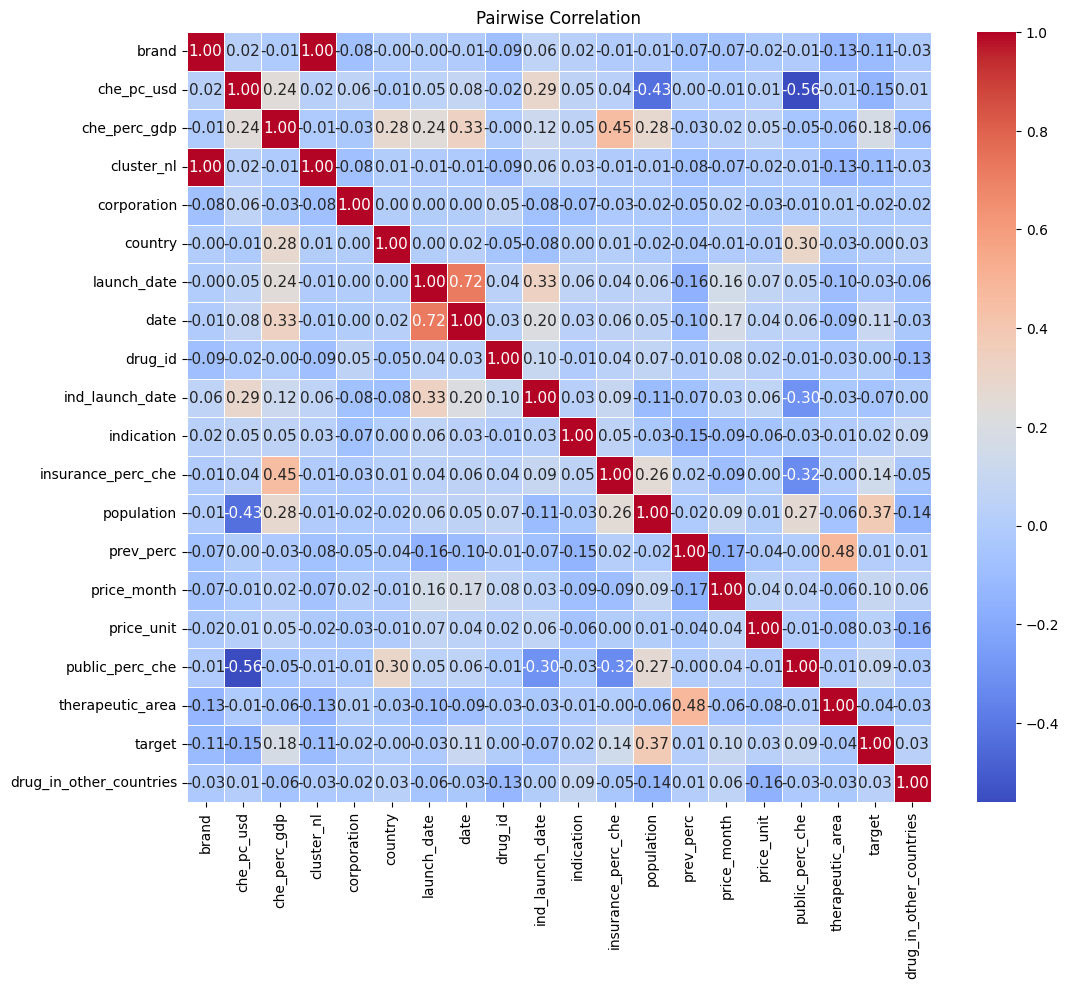


 Pairwise Rangking: 
 target                     1.000000
population                 0.374820
che_perc_gdp               0.176310
che_pc_usd                 0.149415
insurance_perc_che         0.142108
brand                      0.109218
date                       0.108786
cluster_nl                 0.107692
price_month                0.096036
public_perc_che            0.088136
ind_launch_date            0.065925
therapeutic_area           0.035931
drug_in_other_countries    0.032721
price_unit                 0.026885
launch_date                0.025012
indication                 0.022941
corporation                0.018780
prev_perc                  0.011756
drug_id                    0.003951
country                    0.000421
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.173427
15               price_unit    0.137730
13                prev_perc    0.107363
3                cluster_nl   

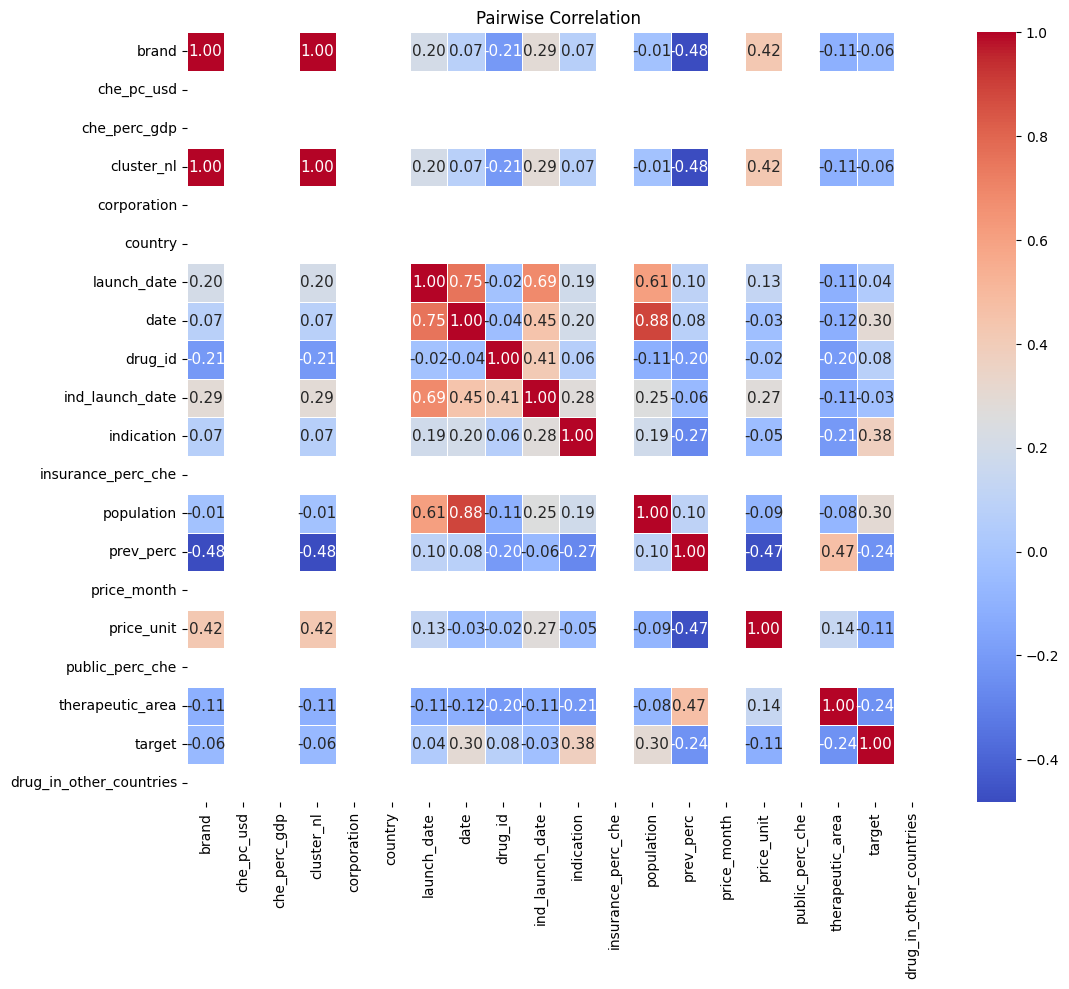


 Pairwise Rangking: 
 target                     1.000000
indication                 0.375757
date                       0.298600
population                 0.295885
therapeutic_area           0.238031
prev_perc                  0.235686
price_unit                 0.114578
drug_id                    0.077595
brand                      0.062112
cluster_nl                 0.062112
launch_date                0.043031
ind_launch_date            0.025638
che_pc_usd                      NaN
che_perc_gdp                    NaN
corporation                     NaN
country                         NaN
insurance_perc_che              NaN
price_month                     NaN
public_perc_che                 NaN
drug_in_other_countries         NaN
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
10               indication    0.409493
7                      date    0.211733
15               price_unit    0.132255
13                prev_perc   

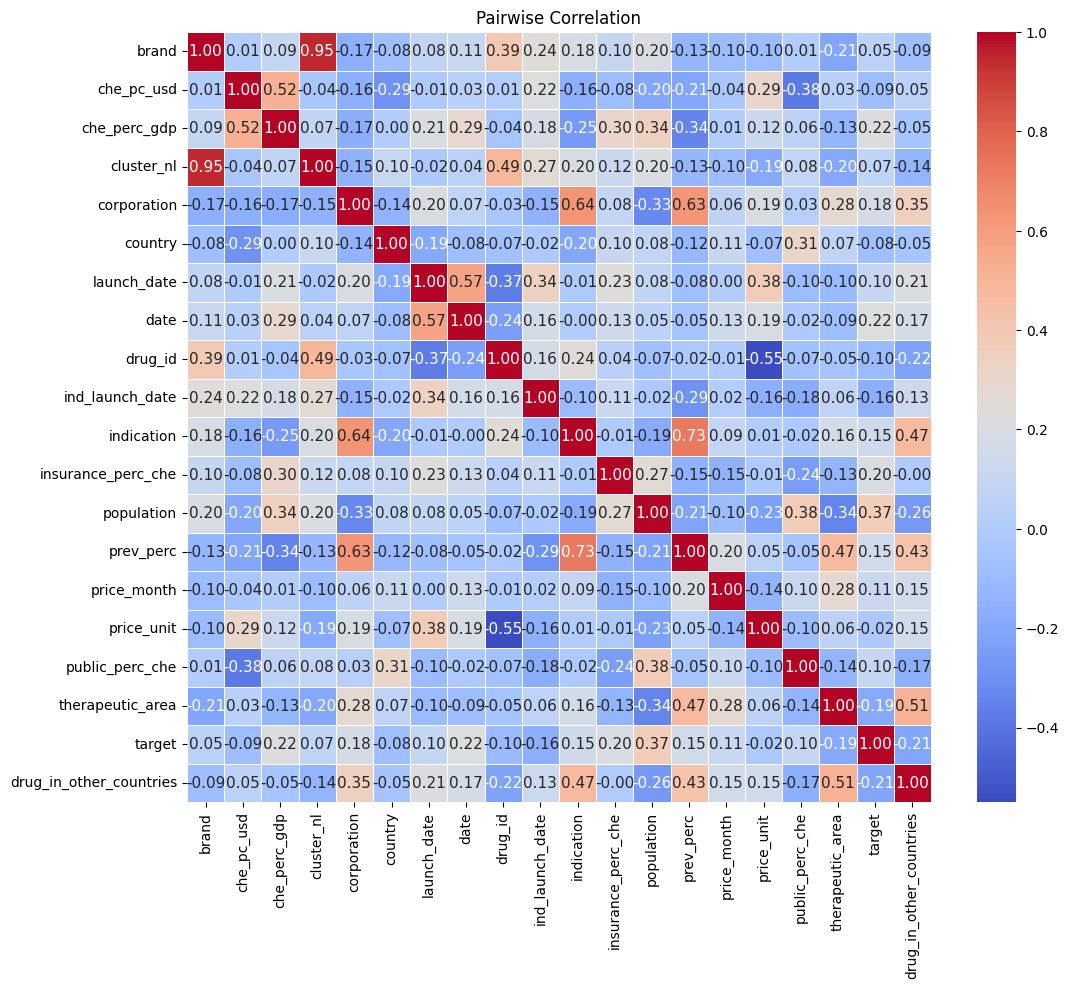


 Pairwise Rangking: 
 target                     1.000000
population                 0.367501
date                       0.224083
che_perc_gdp               0.216040
drug_in_other_countries    0.208380
insurance_perc_che         0.199152
therapeutic_area           0.189075
corporation                0.175718
ind_launch_date            0.158604
prev_perc                  0.152727
indication                 0.145109
price_month                0.112015
drug_id                    0.103068
public_perc_che            0.097225
launch_date                0.095339
che_pc_usd                 0.087978
country                    0.083682
cluster_nl                 0.067898
brand                      0.046608
price_unit                 0.018901
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature    Importance
8                   drug_id  5.461394e-01
7                      date  1.128745e-01
12               population  9.628846e-02
10               indic

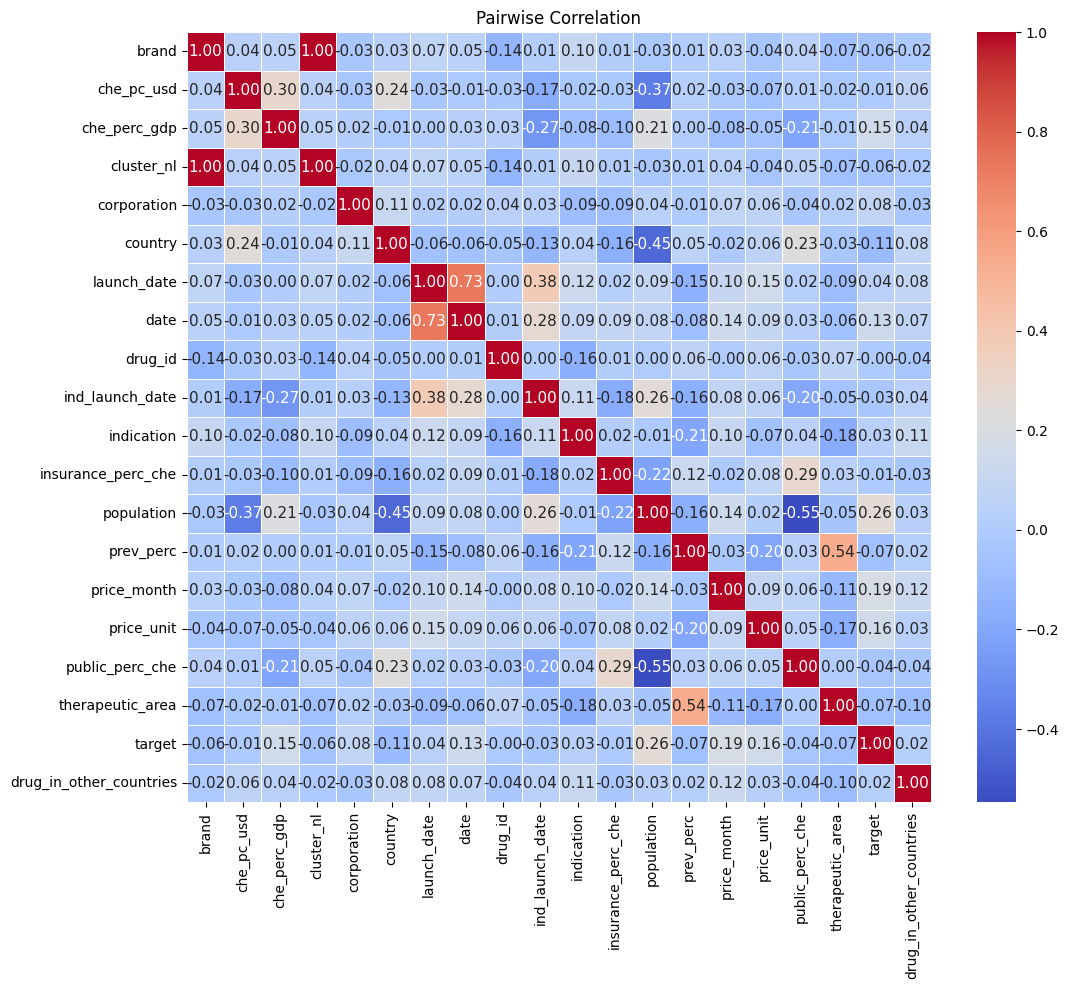


 Pairwise Rangking: 
 target                     1.000000
population                 0.259084
price_month                0.189726
price_unit                 0.155307
che_perc_gdp               0.150070
date                       0.133640
country                    0.105458
corporation                0.079630
therapeutic_area           0.073503
prev_perc                  0.072055
brand                      0.060266
cluster_nl                 0.056731
launch_date                0.044480
public_perc_che            0.043913
ind_launch_date            0.031548
indication                 0.030289
drug_in_other_countries    0.022183
insurance_perc_che         0.008996
che_pc_usd                 0.005917
drug_id                    0.004145
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
12               population    0.184163
3                cluster_nl    0.140363
13                prev_perc    0.135468
14              price_month   

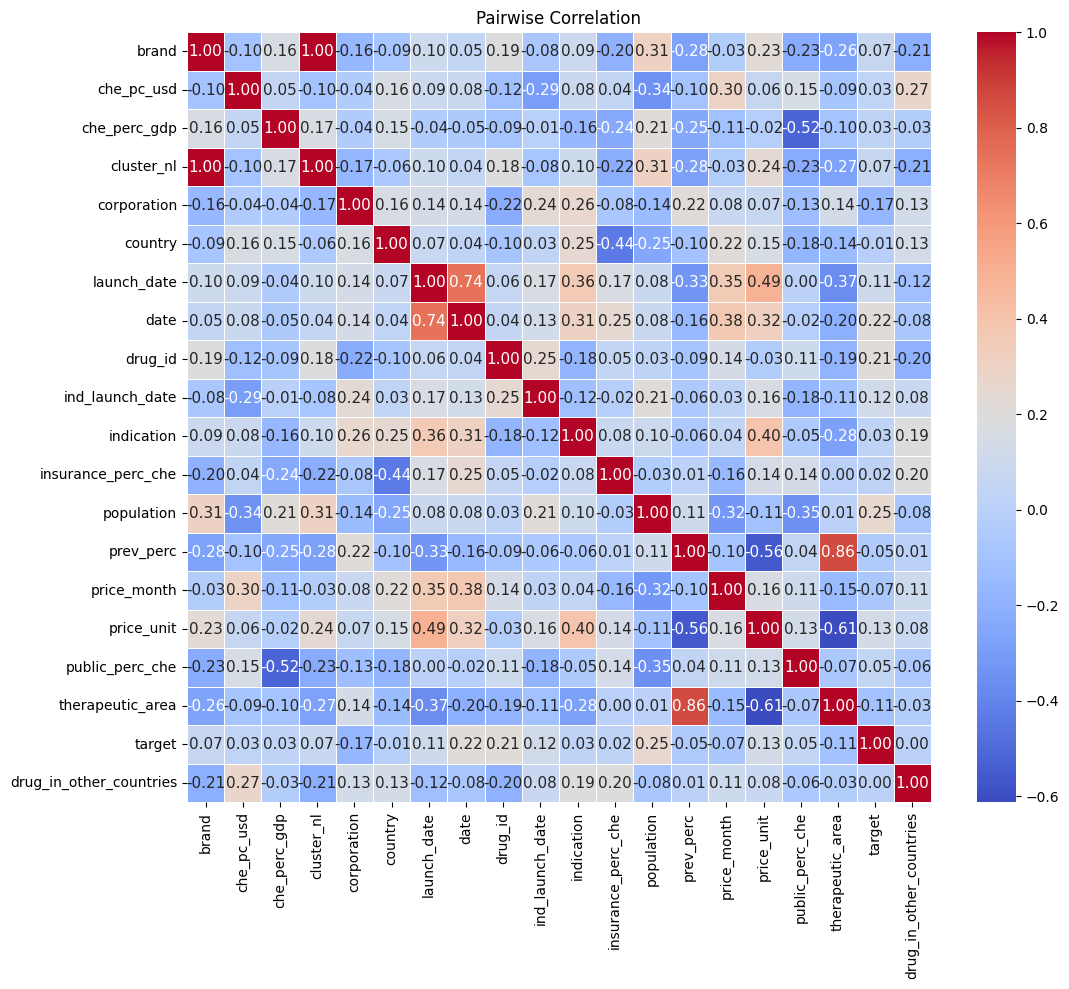


 Pairwise Rangking: 
 target                     1.000000
population                 0.253086
date                       0.217216
drug_id                    0.208365
corporation                0.168164
price_unit                 0.132012
ind_launch_date            0.123034
launch_date                0.110793
therapeutic_area           0.107410
cluster_nl                 0.069590
price_month                0.067953
brand                      0.065189
public_perc_che            0.047495
prev_perc                  0.046828
che_pc_usd                 0.034735
che_perc_gdp               0.027719
indication                 0.025414
insurance_perc_che         0.019600
country                    0.011873
drug_in_other_countries    0.004995
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
13                prev_perc    0.307957
12               population    0.170739
8                   drug_id    0.138589
7                      date   

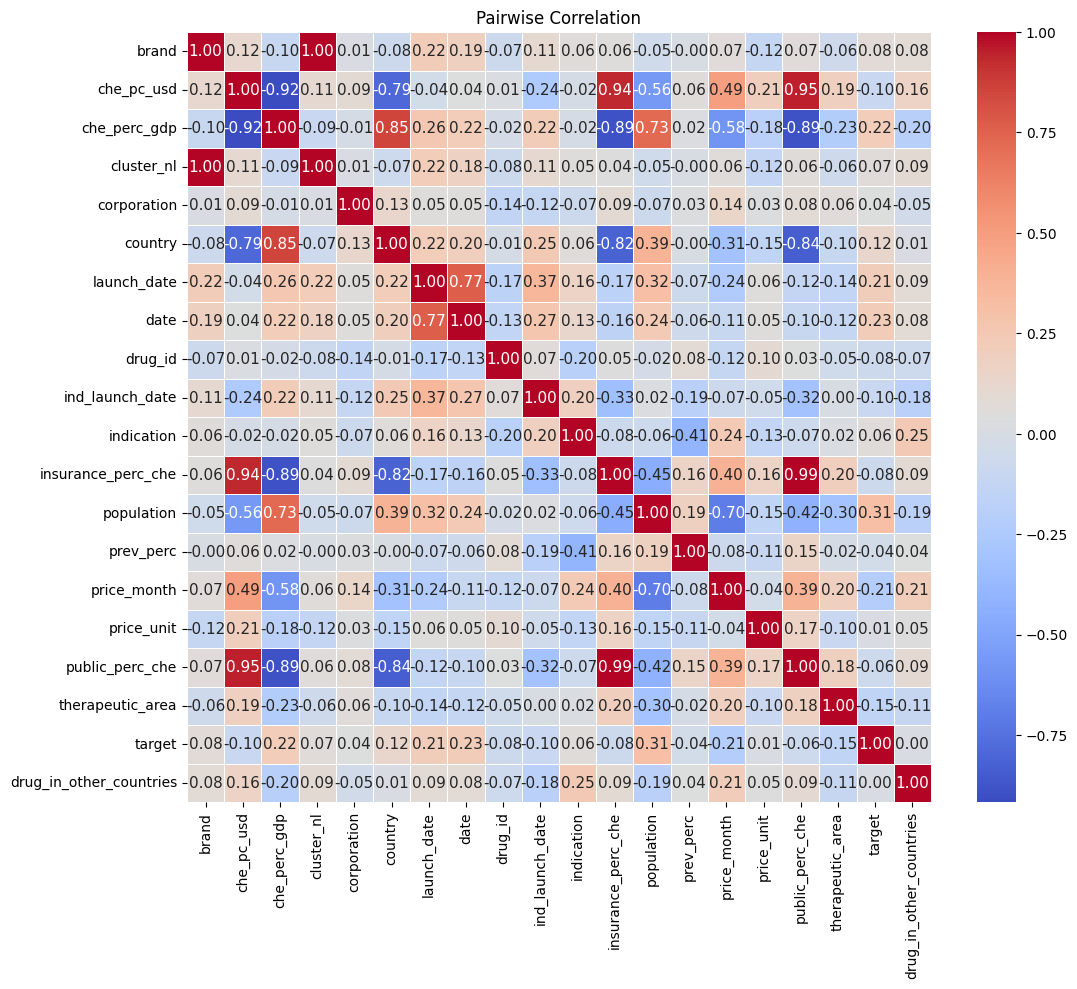


 Pairwise Rangking: 
 target                     1.000000
population                 0.314394
date                       0.227743
che_perc_gdp               0.220023
price_month                0.213645
launch_date                0.212214
therapeutic_area           0.149792
country                    0.124327
ind_launch_date            0.098914
che_pc_usd                 0.098721
brand                      0.079059
drug_id                    0.077465
insurance_perc_che         0.075478
cluster_nl                 0.070469
public_perc_che            0.064105
indication                 0.060440
prev_perc                  0.039901
corporation                0.038121
price_unit                 0.007382
drug_in_other_countries    0.004578
Name: target, dtype: float64

Important Feature By RandomForest: 
                     Feature  Importance
0                     brand    0.204524
3                cluster_nl    0.191913
12               population    0.152897
15               price_unit   

In [10]:
n = 8
for i in range(n):
    print(f'--------------------------------------------------------Start_{i}--------------------------------------------------------')
    df = pd.read_csv(
        f'./cluster_{i}.csv',
        low_memory=False
    )
    dff = df
    
    label_encoder = LabelEncoder()
    
    dff['brand'] =  label_encoder.fit_transform(dff['brand'])
    dff['cluster_nl'] =  label_encoder.fit_transform(dff['cluster_nl'])
    dff['corporation'] =  label_encoder.fit_transform(dff['corporation'])
    dff['country'] =  label_encoder.fit_transform(dff['country'])
    dff['launch_date'] =  label_encoder.fit_transform(dff['launch_date'])
    dff['date'] =  label_encoder.fit_transform(dff['date'])
    dff['ind_launch_date'] =  label_encoder.fit_transform(dff['ind_launch_date'])
    dff['indication'] =  label_encoder.fit_transform(dff['indication'])
    dff['drug_id'] =  label_encoder.fit_transform(dff['drug_id'])
    dff['therapeutic_area'] =  label_encoder.fit_transform(dff['therapeutic_area'])
    dff = dff.drop('therapeutic_area_encoded', axis=1)
    dff = dff.drop('cluster_nl_encoded', axis=1)
    
    columns = ['che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 
               'population', 'prev_perc', 'price_month', 
               'price_unit', 'target']
    
    # Show the statistics for the selected columns
    statistics = dff[columns].describe()
    
    print('statistics\n ',statistics)
    
    pairwise_corr = dff.corr()
    
    # Create the heatmap with larger figure size and adjusted annotations
    plt.figure(figsize=(12, 10))  # Increase the figure size
    sns.heatmap(pairwise_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, annot_kws={'size': 11})
    
    plt.title("Pairwise Correlation")
    plt.show()
    
    target_corr = pairwise_corr['target'].apply(abs).sort_values(ascending=False)
    print('\n Pairwise Rangking: \n',target_corr)
    
    # With RandomForest
    X = dff.drop(columns=['target'])  # Exclude the 'target' column from X
    y = dff['target']  # Target is the 'target' column
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    feature_importances = rf.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })
    
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    print('\nImportant Feature By RandomForest: \n',feature_importance_df)
    print(f'--------------------------------------------------------End_{i}--------------------------------------------------------\n\n')

# Began Modeling

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import math
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppress specific ValueWarnings from statsmodels
warnings.filterwarnings("ignore", category=Warning, module="statsmodels")

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_error_metrics(actual, forecasted):
    mae = np.mean(np.abs(actual - forecasted))
    mape = np.mean(np.abs((actual - forecasted) / actual)) * 100
    mse = np.mean((actual - forecasted) ** 2)
    rmse = np.sqrt(mse)
    return mae, mape, mse, rmse

base_feature = ['population', 'price_unit', 'price_month', 'date','target']
feature_model = {
	0: base_feature + ['che_pc_usd', 'insurance_perc_che'],
	1: base_feature + ['che_perc_gdp'],
	2: base_feature + [],
	3: base_feature + [],
	4: base_feature + ['che_pc_usd', 'che_perc_gdp'],
	5: base_feature + ['indication'],
	6: base_feature + ['prev_perc'],
	7: base_feature +[]
}
cluster_model = {}